<a href="https://colab.research.google.com/github/Aidmora/ErroresExcel/blob/master/Puzzle_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importación de librerías

In [ ]:
# Sección 1: Importación de Librerías
import heapq
from collections import deque
import random
import matplotlib.pyplot as plt
import statistics


2. Definición de heurísticas


In [ ]:
# Sección 2: Definición de Heurísticas

def calcularFichasDesplazadas(estadoActual, estadoObjetivo):
    """
    Calcula el número de fichas que están fuera de lugar en el estado actual.

    :param estadoActual: Tupla que representa el estado actual del 8-puzzle.
    :param estadoObjetivo: Tupla que representa el estado objetivo del 8-puzzle.
    :return: Número de fichas desplazadas.
    """
    return sum(1 for i in range(9) if estadoActual[i] != estadoObjetivo[i] and estadoActual[i] != 0)


3. Funciones Auxiliares

In [ ]:
# Sección 3: Funciones Auxiliares

def obtenerVecinos(estado):
    """
    Genera todos los estados vecinos posibles moviendo la ficha vacía.

    :param estado: Tupla que representa el estado actual del 8-puzzle.
    :return: Lista de tuplas que representan los estados vecinos.
    """
    vecinos = []
    indiceVacio = estado.index(0)  # 0 representa la ficha vacía
    fila, columna = divmod(indiceVacio, 3)
    movimientos = []

    # Definir posibles movimientos
    if fila > 0:
        movimientos.append(-3)  # Mover hacia arriba
    if fila < 2:
        movimientos.append(3)   # Mover hacia abajo
    if columna > 0:
        movimientos.append(-1)  # Mover hacia la izquierda
    if columna < 2:
        movimientos.append(1)   # Mover hacia la derecha

    for movimiento in movimientos:
        nuevoIndice = indiceVacio + movimiento
        nuevoEstado = list(estado)
        nuevoEstado[indiceVacio], nuevoEstado[nuevoIndice] = nuevoEstado[nuevoIndice], nuevoEstado[indiceVacio]
        vecinos.append(tuple(nuevoEstado))

    return vecinos

def esSolvable(estado):
    """
    Verifica si un estado del 8-puzzle es resolvible.

    :param estado: Tupla que representa el estado del 8-puzzle.
    :return: Booleano indicando si es resolvible.
    """
    invCount = 0
    estadoSinCero = [num for num in estado if num != 0]
    for i in range(len(estadoSinCero)):
        for j in range(i + 1, len(estadoSinCero)):
            if estadoSinCero[i] > estadoSinCero[j]:
                invCount += 1
    return invCount % 2 == 0

def generarEstadoAleatorio(estadoObjetivo, numMovimientos=10):
    """
    Genera un estado inicial aleatorio y resolvible del 8-puzzle realizando un número limitado de movimientos desde el estado objetivo.

    :param estadoObjetivo: Tupla que representa el estado objetivo del 8-puzzle.
    :param numMovimientos: Número de movimientos aleatorios a realizar desde el estado objetivo.
    :return: Tupla que representa el estado inicial aleatorio.
    """
    estado = list(estadoObjetivo)
    movimientosRealizados = 0
    ultimoMovimiento = None  # Para evitar movimientos que deshacen el anterior

    while movimientosRealizados < numMovimientos:
        vecinos = obtenerVecinos(tuple(estado))

        # Filtrar movimientos que deshacen el último movimiento
        if ultimoMovimiento is not None:
            if ultimoMovimiento == 'arriba':
                vecinos = [v for v in vecinos if v.index(0) != estado.index(0) - 3]
            elif ultimoMovimiento == 'abajo':
                vecinos = [v for v in vecinos if v.index(0) != estado.index(0) + 3]
            elif ultimoMovimiento == 'izquierda':
                vecinos = [v for v in vecinos if v.index(0) != estado.index(0) - 1]
            elif ultimoMovimiento == 'derecha':
                vecinos = [v for v in vecinos if v.index(0) != estado.index(0) + 1]

        if not vecinos:
            break  # No hay más movimientos posibles

        nuevoEstado = random.choice(vecinos)

        # Determinar el movimiento realizado
        delta = nuevoEstado.index(0) - estado.index(0)
        if delta == -3:
            ultimoMovimiento = 'abajo'
        elif delta == 3:
            ultimoMovimiento = 'arriba'
        elif delta == -1:
            ultimoMovimiento = 'derecha'
        elif delta == 1:
            ultimoMovimiento = 'izquierda'

        estado = list(nuevoEstado)
        movimientosRealizados += 1

    return tuple(estado)



4. Implementación de Algoritmos de Búsqueda

In [ ]:
# Sección 4: Implementación de Algoritmos de Búsqueda

def realizarBFS(estadoInicial, estadoObjetivo, maxIteraciones=100000):
    """
    Realiza la búsqueda en Primero Anchura (BFS) para resolver el 8-puzzle.

    :param estadoInicial: Tupla que representa el estado inicial del 8-puzzle.
    :param estadoObjetivo: Tupla que representa el estado objetivo del 8-puzzle.
    :param maxIteraciones: Máximo de iteraciones permitidas para evitar bloqueos.
    :return: Número de iteraciones que tomó encontrar la solución o None si no se encontró.
    """
    cola = deque([estadoInicial])
    explorados = set()
    iteraciones = 0

    while cola and iteraciones < maxIteraciones:
        estado = cola.popleft()
        iteraciones += 1

        if estado == estadoObjetivo:
            return iteraciones

        explorados.add(estado)

        for vecino in obtenerVecinos(estado):
            if vecino not in explorados and vecino not in cola:
                cola.append(vecino)

    return None  # Indica que no se encontró la solución dentro del límite de iteraciones

def realizarBusquedaGreedy(estadoInicial, estadoObjetivo, heuristica, maxIteraciones=100000):
    """
    Realiza la búsqueda Greedy (Búsqueda Voraz) para resolver el 8-puzzle.

    :param estadoInicial: Tupla que representa el estado inicial del 8-puzzle.
    :param estadoObjetivo: Tupla que representa el estado objetivo del 8-puzzle.
    :param heuristica: Función heurística a utilizar.
    :param maxIteraciones: Máximo de iteraciones permitidas para evitar bloqueos.
    :return: Número de iteraciones que tomó encontrar la solución o None si no se encontró.
    """
    colaPrioridad = []
    heapq.heappush(colaPrioridad, (heuristica(estadoInicial, estadoObjetivo), estadoInicial))
    explorados = set()
    iteraciones = 0

    while colaPrioridad and iteraciones < maxIteraciones:
        _, estado = heapq.heappop(colaPrioridad)
        iteraciones += 1

        if estado == estadoObjetivo:
            return iteraciones

        explorados.add(estado)

        for vecino in obtenerVecinos(estado):
            if vecino not in explorados:
                heapq.heappush(colaPrioridad, (heuristica(vecino, estadoObjetivo), vecino))

    return None  # Indica que no se encontró la solución dentro del límite de iteraciones

def realizarAStar(estadoInicial, estadoObjetivo, heuristica, maxIteraciones=100000):
    """
    Realiza la búsqueda A* para resolver el 8-puzzle.

    :param estadoInicial: Tupla que representa el estado inicial del 8-puzzle.
    :param estadoObjetivo: Tupla que representa el estado objetivo del 8-puzzle.
    :param heuristica: Función heurística a utilizar.
    :param maxIteraciones: Máximo de iteraciones permitidas para evitar bloqueos.
    :return: Número de iteraciones que tomó encontrar la solución o None si no se encontró.
    """
    colaPrioridad = []
    heapq.heappush(colaPrioridad, (heuristica(estadoInicial, estadoObjetivo), 0, estadoInicial))
    explorados = set()
    costoAcumulado = {estadoInicial: 0}
    iteraciones = 0

    while colaPrioridad and iteraciones < maxIteraciones:
        _, costo, estado = heapq.heappop(colaPrioridad)
        iteraciones += 1

        if estado == estadoObjetivo:
            return iteraciones

        explorados.add(estado)

        for vecino in obtenerVecinos(estado):
            nuevoCosto = costo + 1  # Cada movimiento tiene costo 1
            if vecino not in costoAcumulado or nuevoCosto < costoAcumulado[vecino]:
                costoAcumulado[vecino] = nuevoCosto
                prioridad = nuevoCosto + heuristica(vecino, estadoObjetivo)
                heapq.heappush(colaPrioridad, (prioridad, nuevoCosto, vecino))

    return None  # Indica que no se encontró la solución dentro del límite de iteraciones



5. Ejecución de Algoritmos y Recolección de Resultados

In [ ]:
# Sección 5: Ejecución de Algoritmos y Recolección de Resultados

# Definición del Estado Objetivo
estadoObjetivo = (0, 1, 2,
                 3, 4, 5,
                 6, 7, 8)

# Listas para almacenar el número de iteraciones de cada algoritmo
iteracionesBFS = []
iteracionesGreedy = []
iteracionesAStar = []

# Número de ejecuciones
numEjecuciones = 50

for ejecucion in range(1, numEjecuciones + 1):
    estadoInicial = generarEstadoAleatorio(estadoObjetivo)

    # Ejecutar BFS
    iterBFS = realizarBFS(estadoInicial, estadoObjetivo)
    if iterBFS is not None:
        iteracionesBFS.append(iterBFS)
    else:
        iteracionesBFS.append(100000)  # Asignar el máximo si no se encontró solución
        print(f"Ejecución {ejecucion}: BFS no encontró solución dentro del límite de iteraciones.")

    # Ejecutar Búsqueda Greedy con Fichas Desplazadas
    iterGreedy = realizarBusquedaGreedy(estadoInicial, estadoObjetivo, calcularFichasDesplazadas)
    if iterGreedy is not None:
        iteracionesGreedy.append(iterGreedy)
    else:
        iteracionesGreedy.append(100000)
        print(f"Ejecución {ejecucion}: Greedy no encontró solución dentro del límite de iteraciones.")

    # Ejecutar A* con Fichas Desplazadas
    iterAStar = realizarAStar(estadoInicial, estadoObjetivo, calcularFichasDesplazadas)
    if iterAStar is not None:
        iteracionesAStar.append(iterAStar)
    else:
        iteracionesAStar.append(100000)
        print(f"Ejecución {ejecucion}: A* no encontró solución dentro del límite de iteraciones.")

    print(f"Ejecución {ejecucion} completada.")



Ejecución 1 completada.
Ejecución 2 completada.
Ejecución 3 completada.
Ejecución 4 completada.
Ejecución 5 completada.
Ejecución 6 completada.
Ejecución 7 completada.
Ejecución 8 completada.
Ejecución 9 completada.
Ejecución 10 completada.
Ejecución 11 completada.
Ejecución 12 completada.
Ejecución 13 completada.
Ejecución 14 completada.
Ejecución 15 completada.
Ejecución 16 completada.
Ejecución 17 completada.
Ejecución 18 completada.
Ejecución 19 completada.
Ejecución 20 completada.
Ejecución 21 completada.
Ejecución 22 completada.
Ejecución 23 completada.
Ejecución 24 completada.
Ejecución 25 completada.
Ejecución 26 completada.
Ejecución 27 completada.
Ejecución 28 completada.
Ejecución 29 completada.
Ejecución 30 completada.
Ejecución 31 completada.
Ejecución 32 completada.
Ejecución 33 completada.
Ejecución 34 completada.
Ejecución 35 completada.
Ejecución 36 completada.
Ejecución 37 completada.
Ejecución 38 completada.
Ejecución 39 completada.
Ejecución 40 completada.
Ejecución

6. Visualización de Resultados

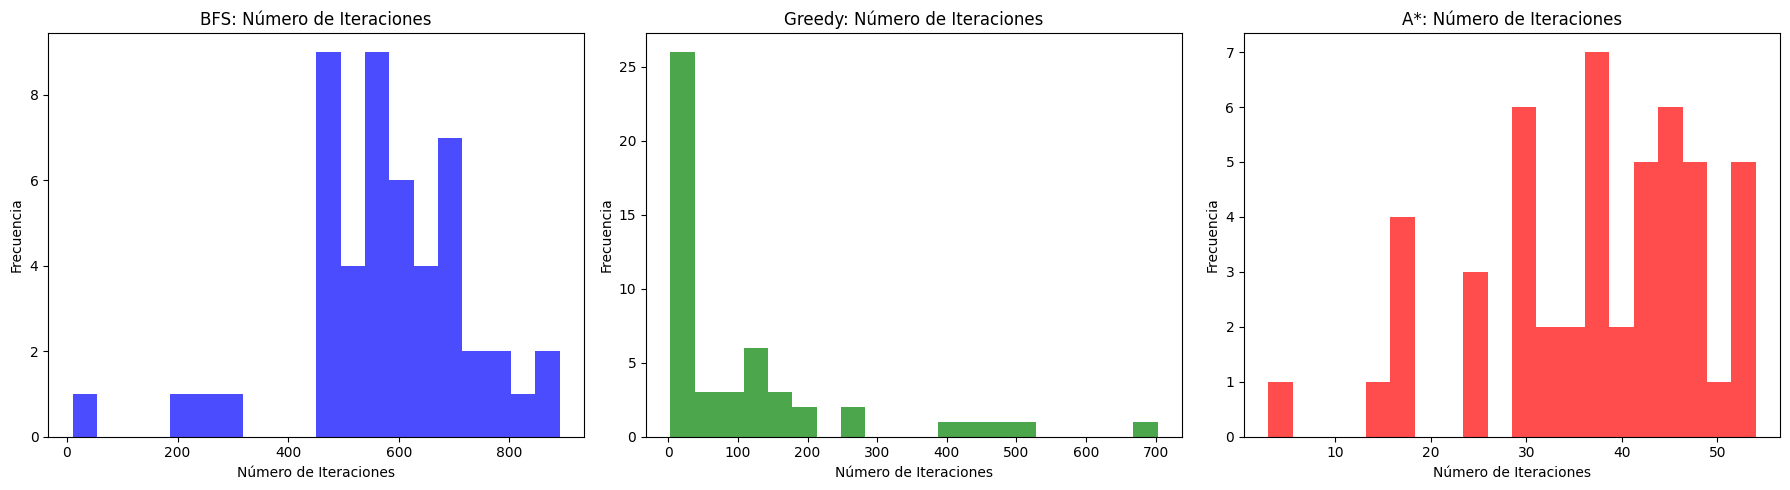

In [ ]:
# Sección 6: Visualización de Resultados (Histogramas)

plt.figure(figsize=(18, 5))

# Histograma para BFS
plt.subplot(1, 3, 1)
plt.hist(iteracionesBFS, bins=20, color='blue', alpha=0.7)
plt.xlabel('Número de Iteraciones')
plt.ylabel('Frecuencia')
plt.title('BFS: Número de Iteraciones')

# Histograma para Búsqueda Greedy
plt.subplot(1, 3, 2)
plt.hist(iteracionesGreedy, bins=20, color='green', alpha=0.7)
plt.xlabel('Número de Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Greedy: Número de Iteraciones')

# Histograma para A*
plt.subplot(1, 3, 3)
plt.hist(iteracionesAStar, bins=20, color='red', alpha=0.7)
plt.xlabel('Número de Iteraciones')
plt.ylabel('Frecuencia')
plt.title('A*: Número de Iteraciones')

plt.tight_layout()
plt.show()



7. Cálculo del promedio de iteraciones y desviación estándar

In [ ]:
# Sección 7: Cálculo de Estadísticas (Promedio y Desviación Estándar)

promedioBFS = statistics.mean(iteracionesBFS)
desviacionBFS = statistics.stdev(iteracionesBFS) if len(iteracionesBFS) > 1 else 0

promedioGreedy = statistics.mean(iteracionesGreedy)
desviacionGreedy = statistics.stdev(iteracionesGreedy) if len(iteracionesGreedy) > 1 else 0

promedioAStar = statistics.mean(iteracionesAStar)
desviacionAStar = statistics.stdev(iteracionesAStar) if len(iteracionesAStar) > 1 else 0

print(f"BFS - Promedio de Iteraciones: {promedioBFS:.2f}, Desviación Estándar: {desviacionBFS:.2f}")
print(f"Greedy - Promedio de Iteraciones: {promedioGreedy:.2f}, Desviación Estándar: {desviacionGreedy:.2f}")
print(f"A* - Promedio de Iteraciones: {promedioAStar:.2f}, Desviación Estándar: {desviacionAStar:.2f}")


BFS - Promedio de Iteraciones: 576.76, Desviación Estándar: 160.00
Greedy - Promedio de Iteraciones: 110.04, Desviación Estándar: 151.82
A* - Promedio de Iteraciones: 37.10, Desviación Estándar: 11.83
